In [134]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)


In [135]:

import math


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from scipy import stats

pd.options.display.max_columns = None # recordamos que este comando nos permitía ver todas las columnas de dataframe

In [136]:
import warnings
warnings.filterwarnings('ignore')

In [137]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [139]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [140]:
df_numericas = df.select_dtypes(include=np.number).columns


IndexError: index 3 is out of bounds for axis 0 with size 3

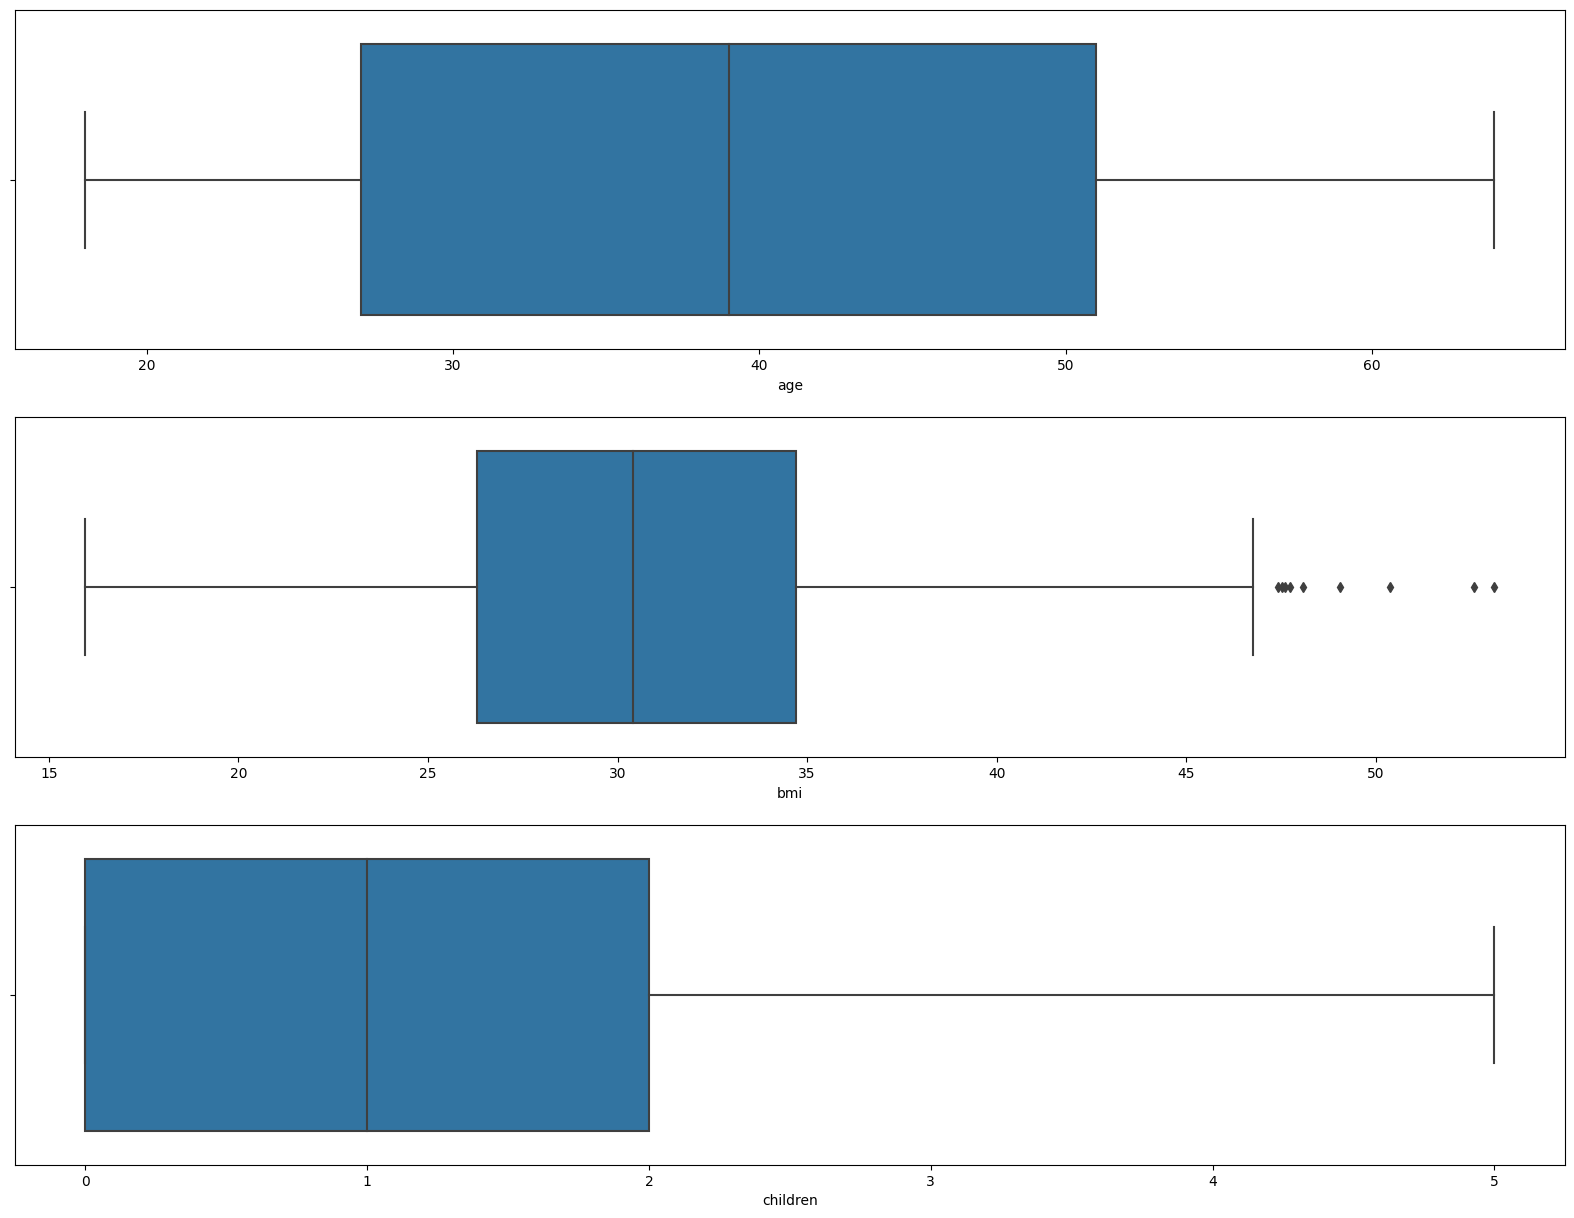

In [141]:
fig, ax = plt.subplots(3, 1, figsize=(20,15))

for i in range(len(df_numericas)):
    sns.boxplot(x=df_numericas[i], data=df, ax=ax[i])
plt.show()

In [142]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [143]:
lista_columnas = df_numericas
lista_columnas

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [144]:
ind = detectar_outliers(lista_columnas, df)
print(ind)

{'bmi': [116, 286, 401, 543, 847, 860, 1047, 1088, 1317], 'charges': [14, 19, 23, 29, 30, 34, 38, 39, 49, 53, 55, 82, 84, 86, 94, 109, 123, 146, 158, 161, 175, 185, 203, 223, 240, 242, 251, 252, 254, 256, 263, 265, 271, 281, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 420, 421, 422, 441, 476, 488, 500, 524, 530, 543, 549, 558, 569, 577, 587, 609, 615, 621, 623, 629, 665, 667, 668, 674, 677, 682, 689, 697, 706, 725, 736, 738, 739, 742, 759, 803, 819, 826, 828, 842, 845, 850, 852, 856, 860, 883, 893, 901, 917, 947, 951, 953, 956, 958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062, 1070, 1078, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146, 1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323]}


In [145]:
for k, v in ind.items():
    if k == "bmi":
        media = df[k].mean() 
        for i in v: 
            df.loc[i,k] = media   
    else: 
        mediana = df[k].median()
        for i in v: 
            df.loc[i,k] = mediana 
        

In [146]:
for k, v in ind.items():
    if k == "charges":
        media = df[k].mean() 
        for i in v: 
            df.loc[i,k] = media   
    else: 
        mediana = df[k].median()
        for i in v: 
            df.loc[i,k] = mediana 

In [147]:
df["bmi"].mean()

30.536423766816142

In [148]:
df_numericas2 = df.select_dtypes(include = np.number)

In [149]:
above_15000 = df[df['charges'] > 15000]
below_15000 = df[df['charges'] <= 15000]


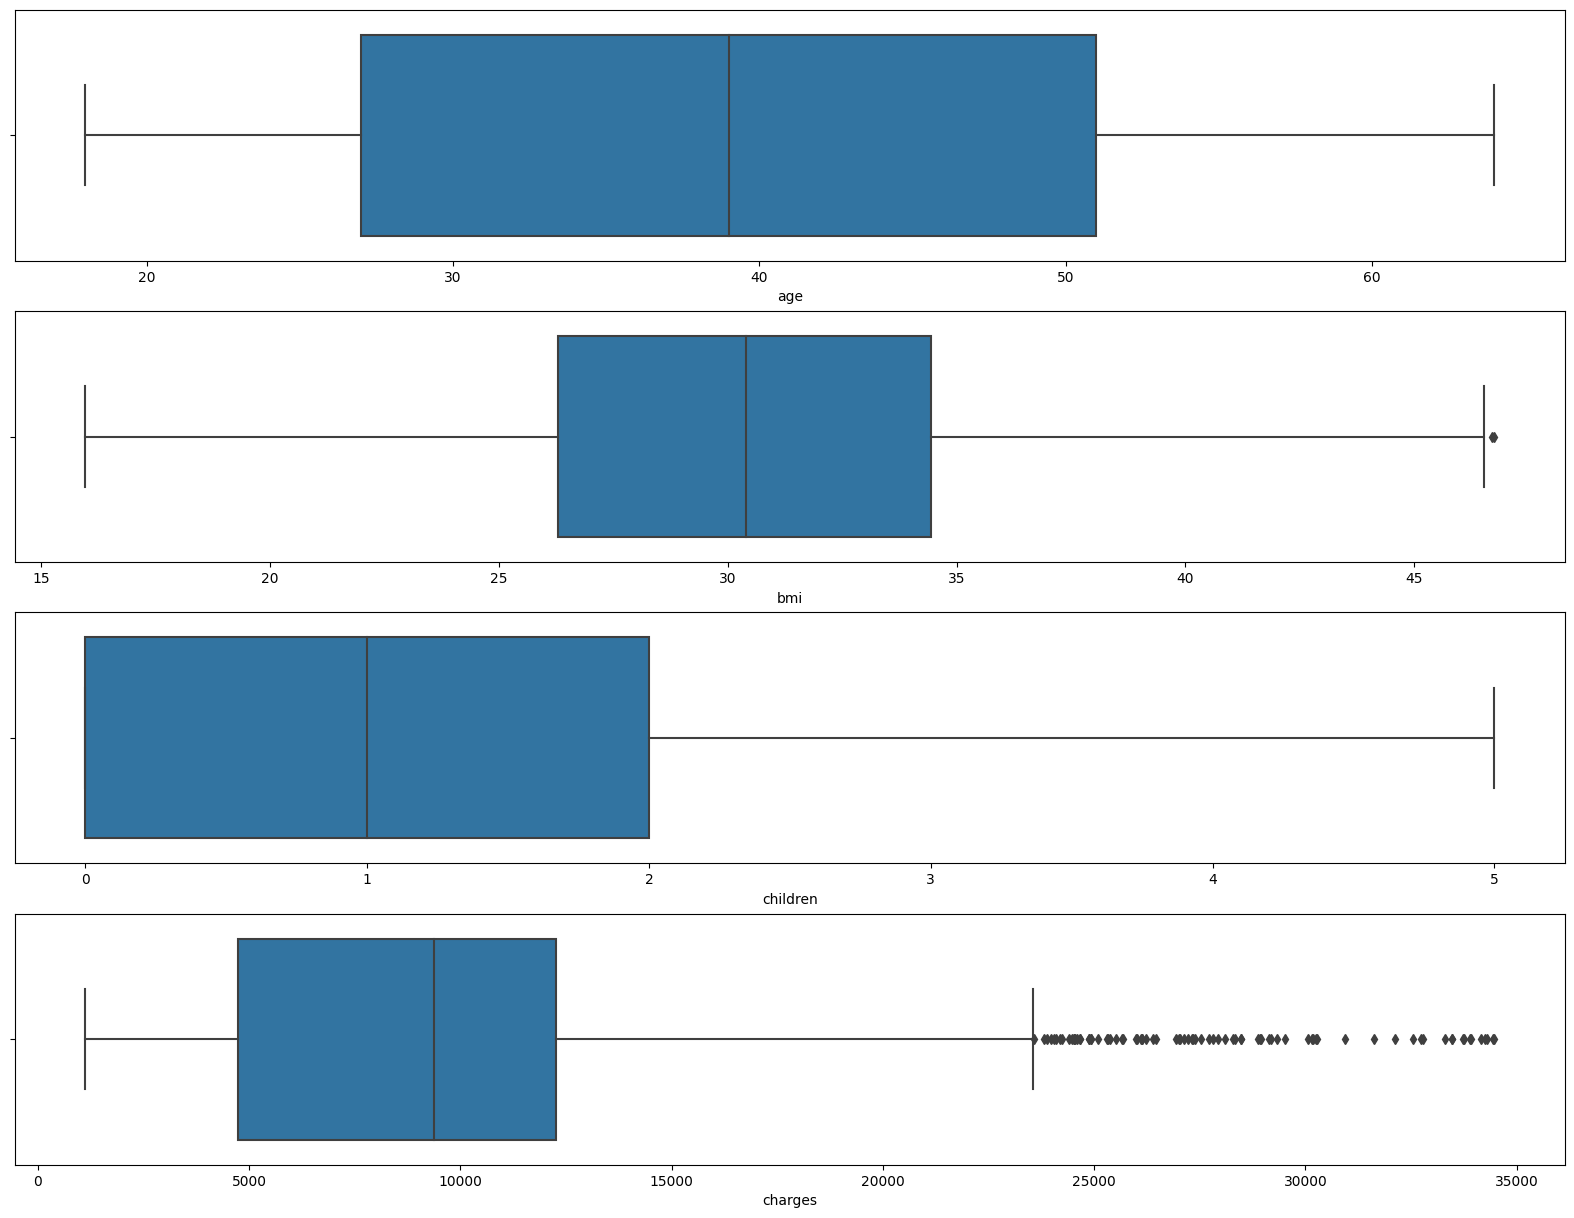

In [150]:
fig, ax = plt.subplots(4, 1, figsize=(20,15))

for i in range(len(df_numericas)):
    sns.boxplot(x=df_numericas[i], data=df, ax=ax[i])
plt.show()

In [151]:
df.loc[438,"bmi"]

46.75

In [152]:
df["bmi"].max()

46.75

In [153]:
df.shape

(1338, 7)

In [154]:
above_15000.shape

(219, 7)

In [155]:
below_15000

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.6850
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335


In [156]:
Q1 = np.nanpercentile(df['charges'], 25)
# cálculo del Q3
Q3 = np.nanpercentile(df['charges'], 75)
#calculemos el IQR
IQR = Q3 - Q1

In [157]:
above_15000 = df_numericas2[df_numericas2['charges'] >= Q3]
below_15000 = df_numericas2[df_numericas2['charges'] < Q3]


<AxesSubplot: >

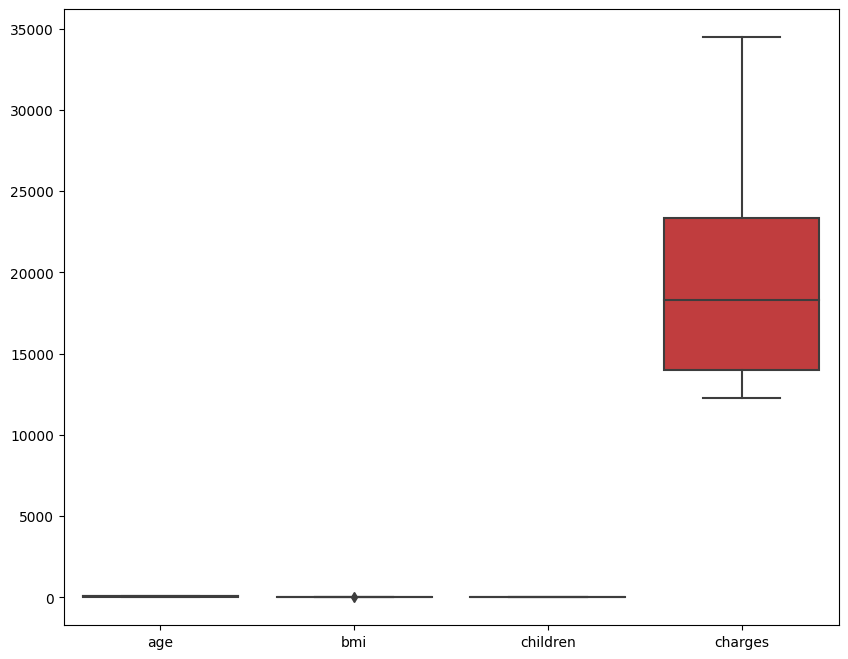

In [158]:
sns.boxplot(data = above_15000)

KeyError: 0

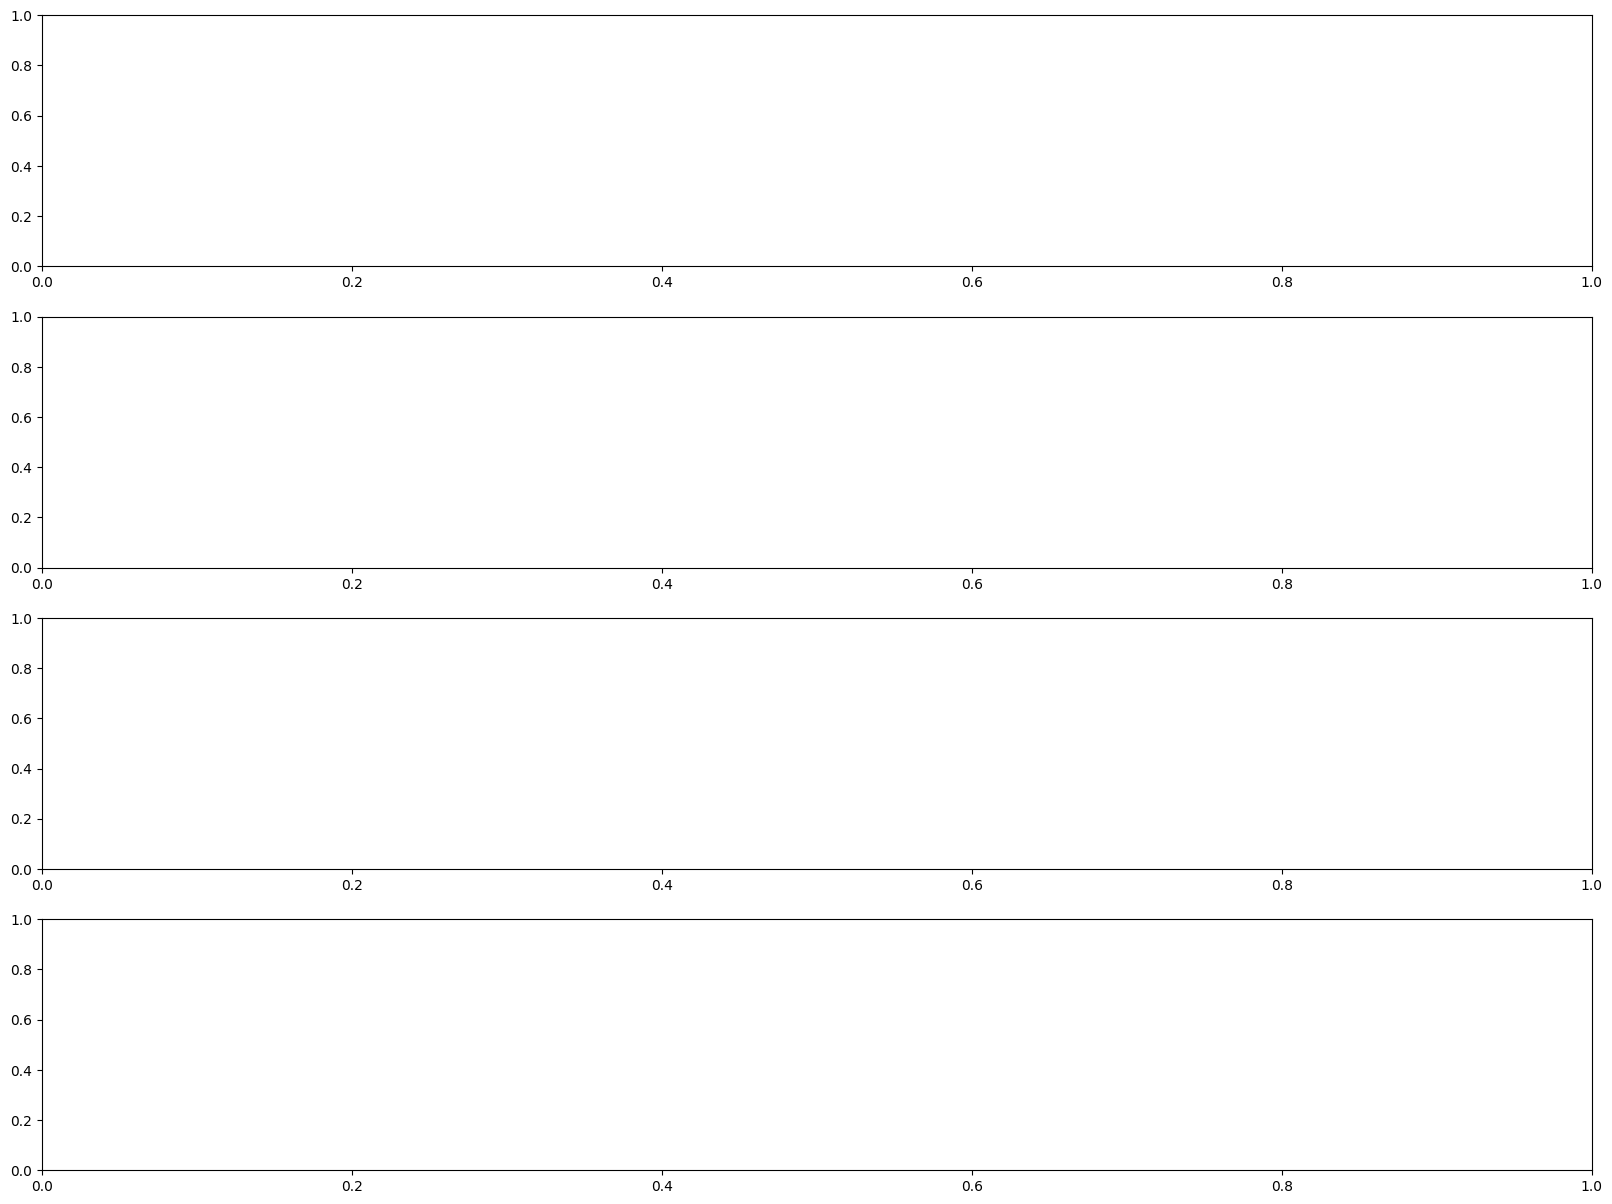

In [159]:
fig, ax = plt.subplots(4, 1, figsize=(20,15))

for i in range(len(below_15000)):
    sns.boxplot(x=below_15000[i], data=df, ax=ax[i])
plt.show()

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


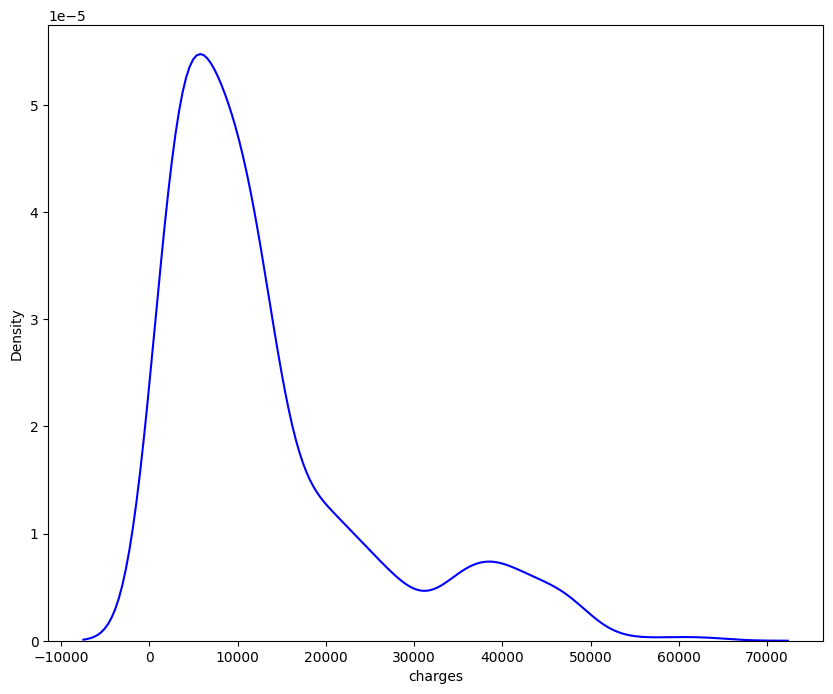

In [ ]:
sns.kdeplot(
    df.charges, 
    color = "blue", 
    );

In [ ]:
df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


ValueError: Invalid RGBA argument: ['crimson', 'deepskyblue', 'goldenrod']

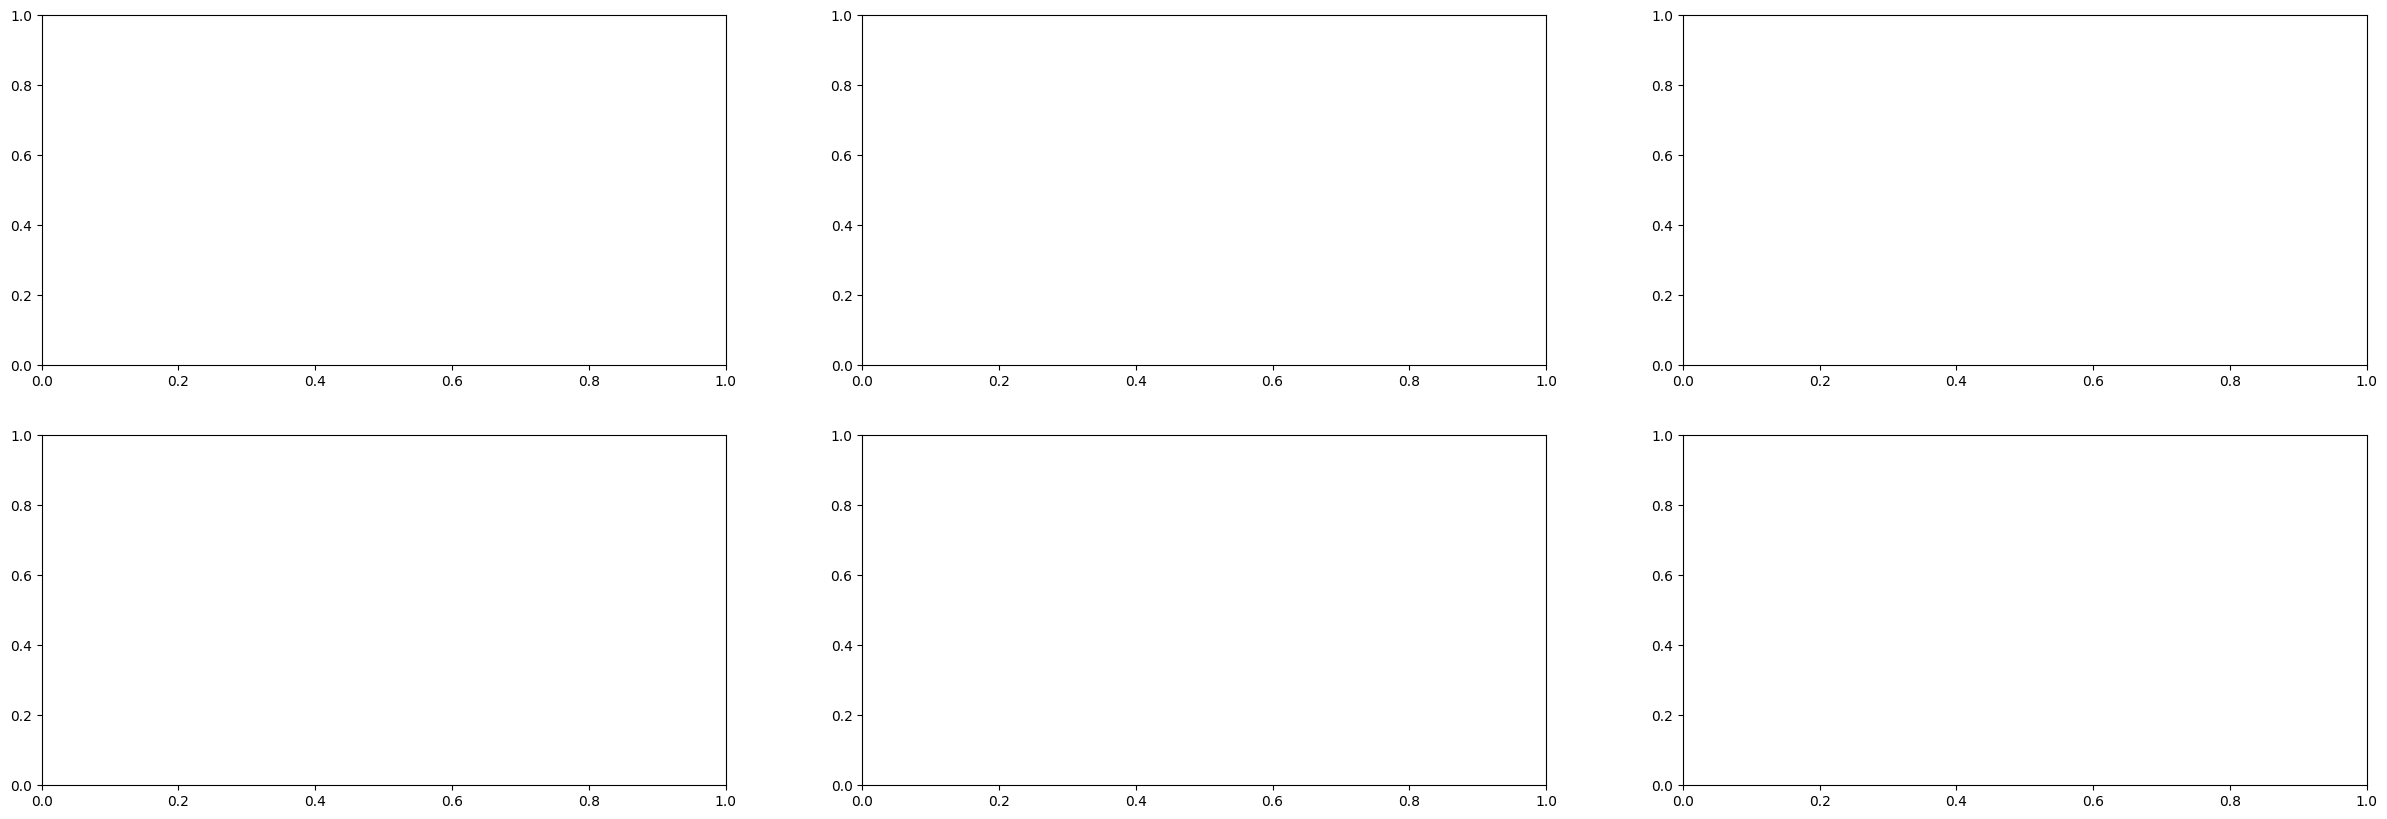

In [ ]:

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")
colors = ["crimson", "deepskyblue", "goldenrod"]

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = colors, 
        line_kws = {"linewidth": 1}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

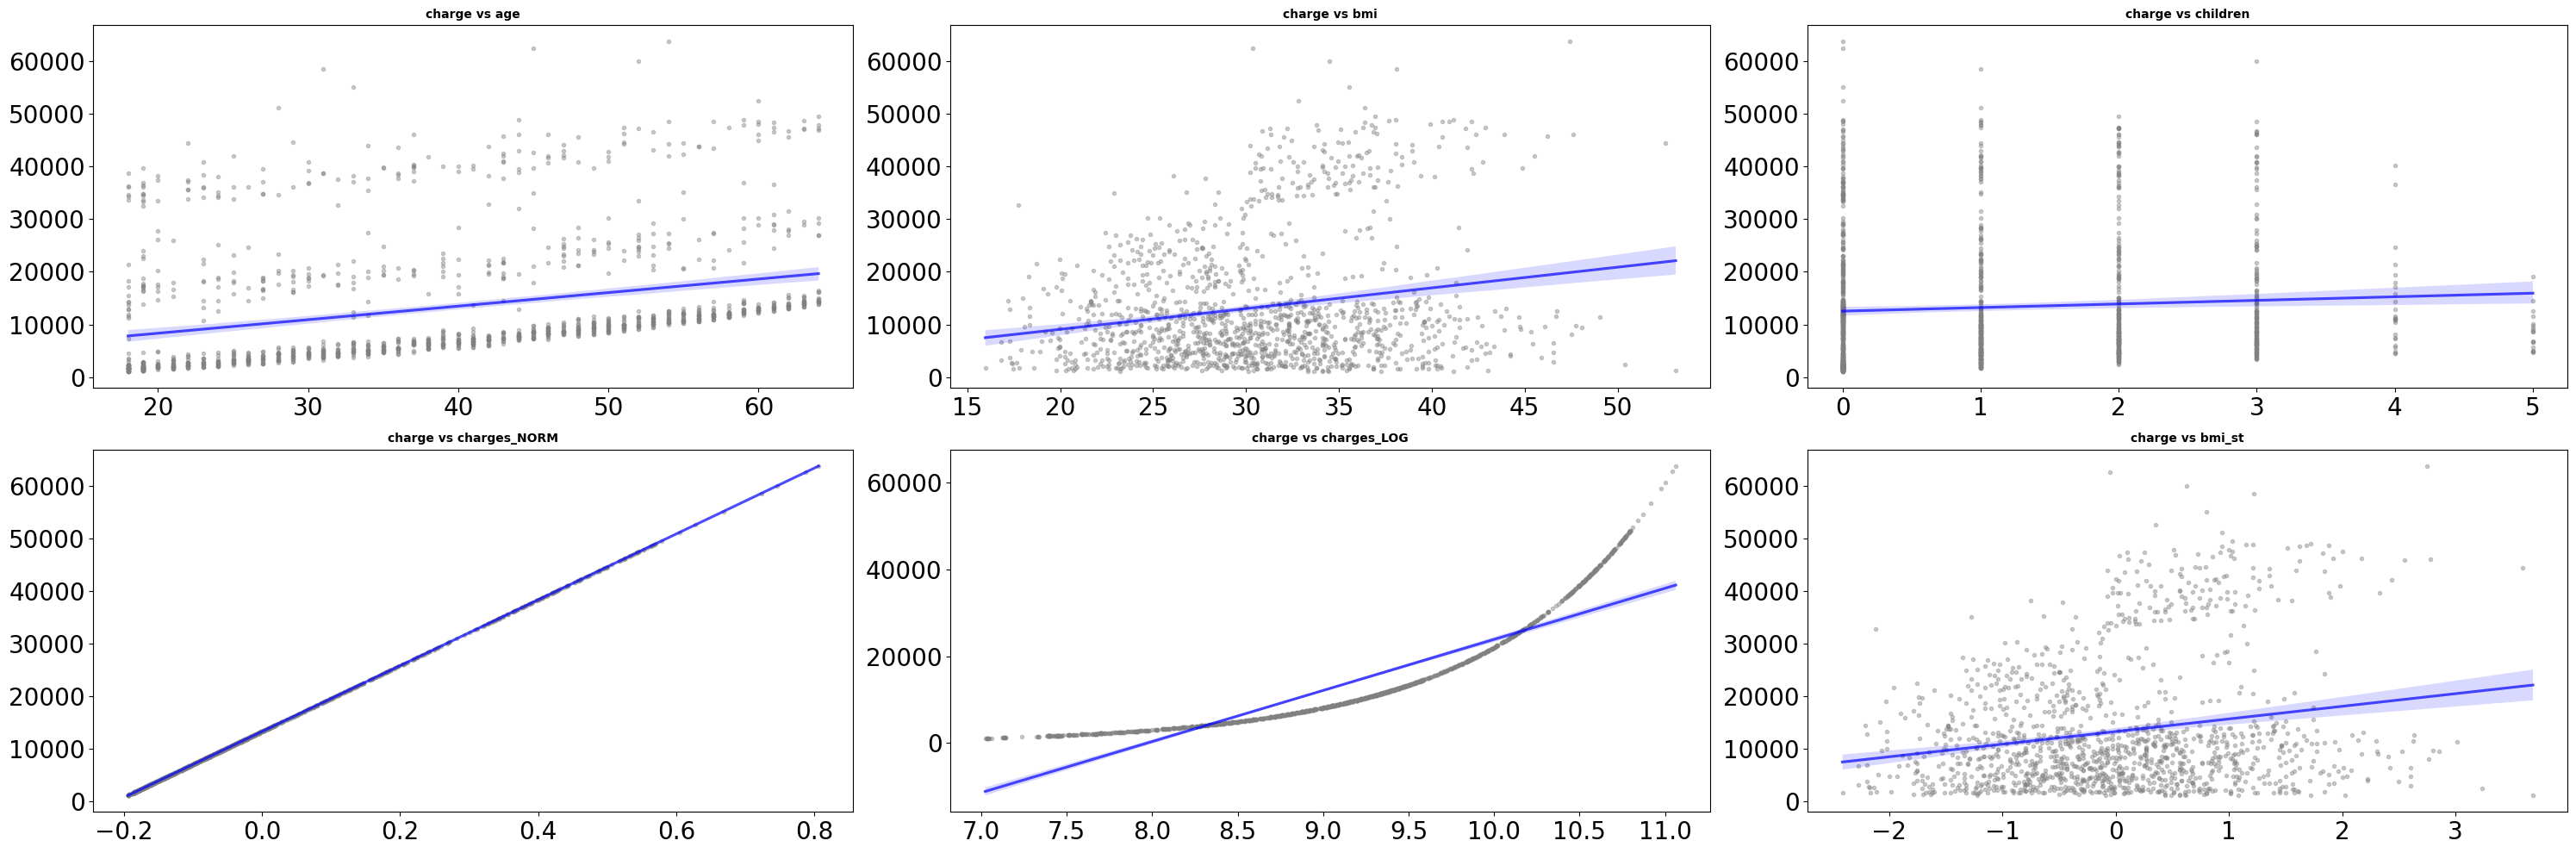

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "blue", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"charge vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
mask

C:\Users\jacob\AppData\Local\Temp\ipykernel_24076\1747955311.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
C:\Users\jacob\AppData\Local\Temp\ipykernel_24076\1747955311.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))


array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

IndexError: index 2 is out of bounds for axis 0 with size 2

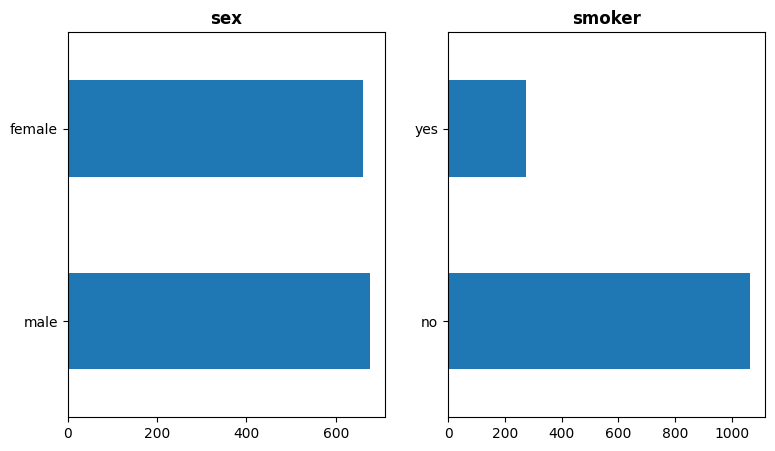

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (9,5))

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

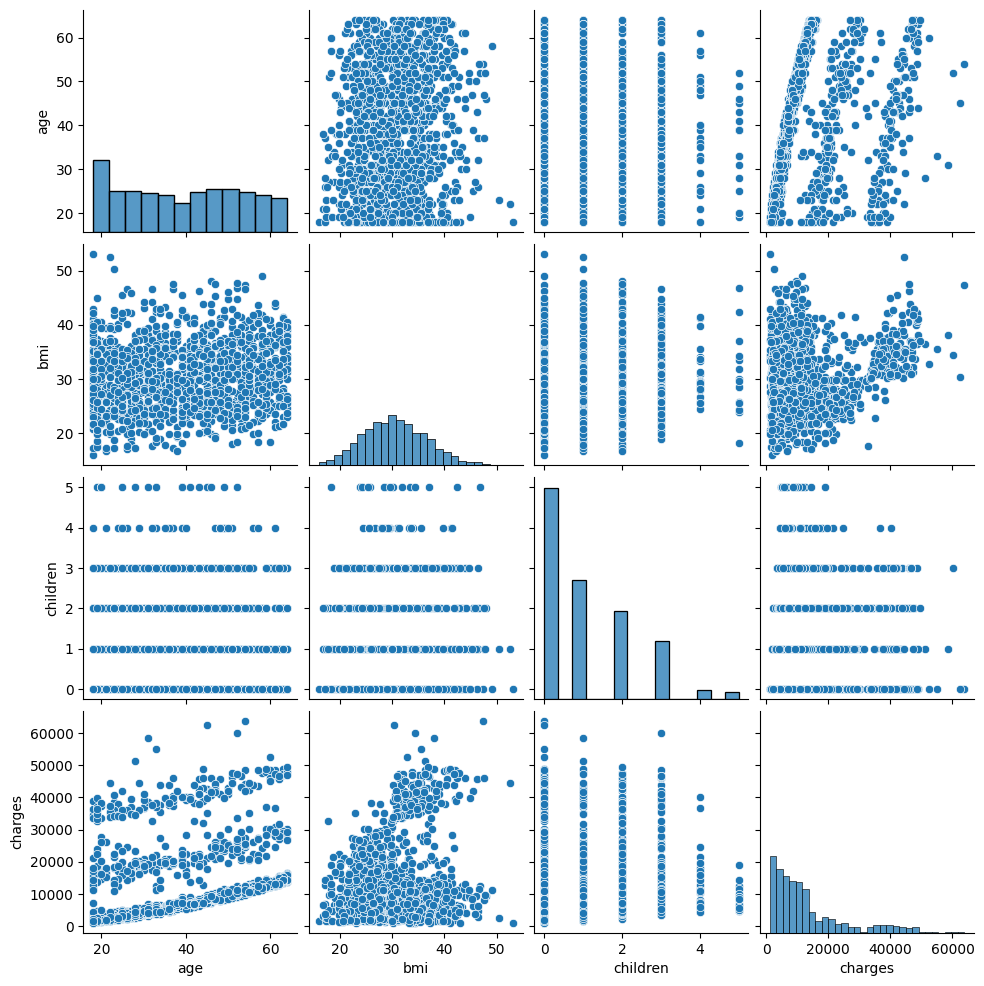

In [ ]:
sns.pairplot(data = df)

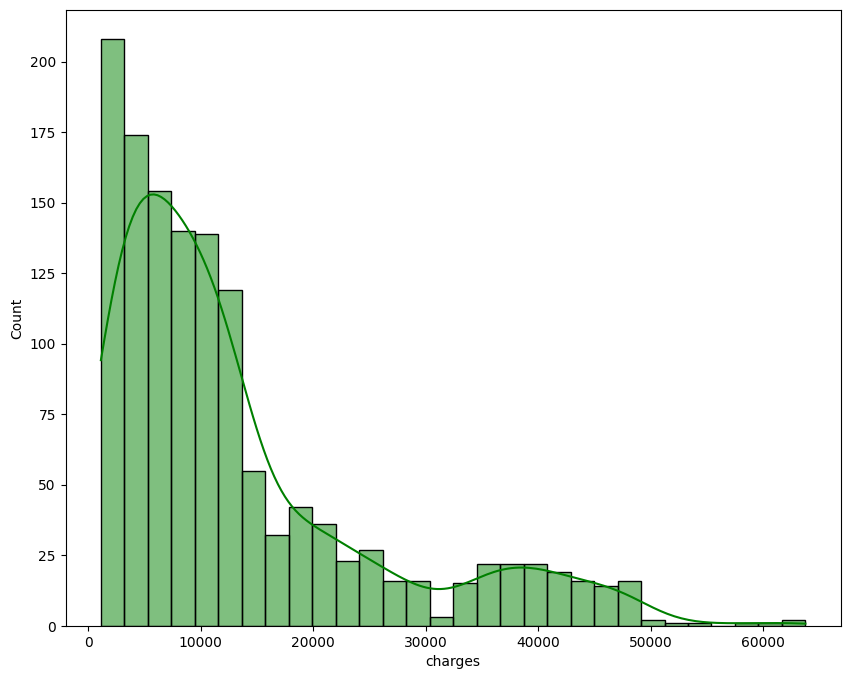

In [ ]:
sns.histplot(df["charges"], 
             kde = True, 
             color = "green");

In [ ]:
stats.shapiro(df["charges"])

ShapiroResult(statistic=0.8146880865097046, pvalue=1.1505194006561963e-36)

In [ ]:
media = df["charges"].mean()
maximo = df["charges"].max() 
minimo = df["charges"].min()

df["charges_NORM"] = (df["charges"] - media) / (maximo - minimo )

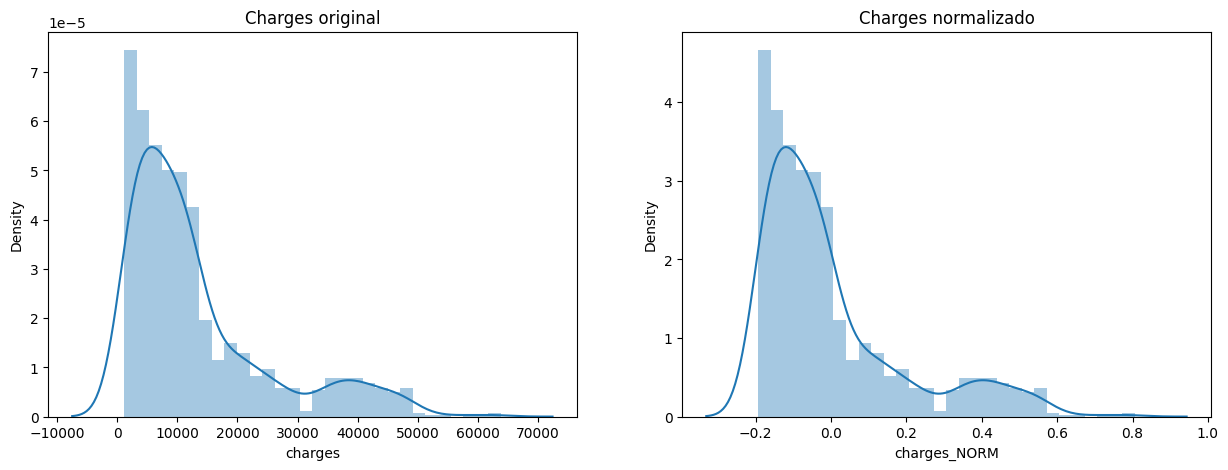

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Charges original')
axes[1].set_title('Charges normalizado')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df['charges_NORM'], ax = axes[1]);

In [ ]:
df['charges_LOG'] = df['charges'].apply(lambda x: np.log(x) if x != 0 else 0)


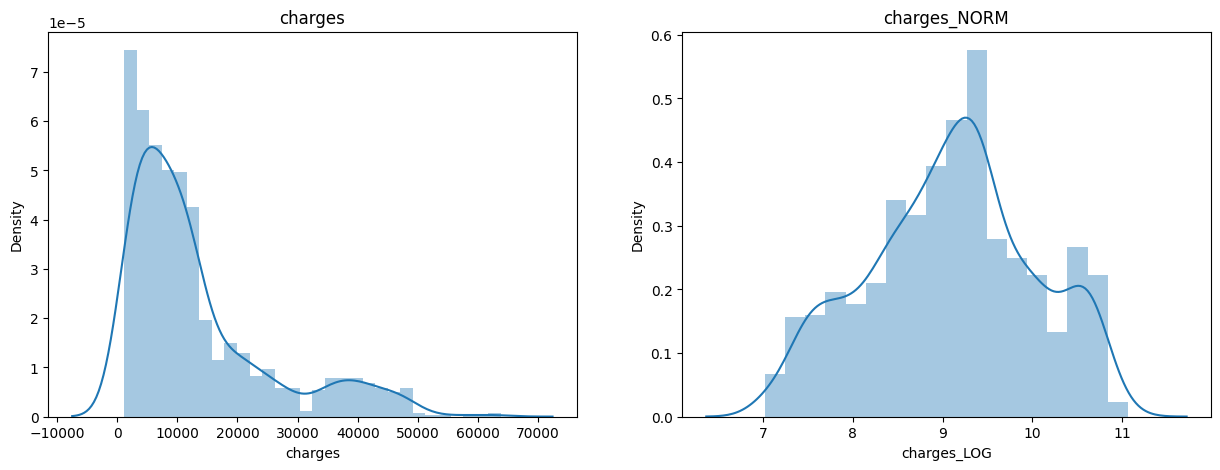

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges')
axes[1].set_title('charges_NORM')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df['charges_LOG'], ax = axes[1]);

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,charges_NORM,charges_LOG
0,19,female,27.900,0,yes,southwest,16884.92400,0.057695,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,-0.184280,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,-0.140801,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,0.139094,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,-0.150100,8.260197


In [ ]:
media = df["bmi"].mean()
desviación = df["bmi"].std()

In [ ]:
df["bmi_st"] =  (df["bmi"]-media)/desviación

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,charges_NORM,charges_LOG,bmi_st
0,19,female,27.900,0,yes,southwest,16884.92400,0.057695,9.734176,-0.453151
1,18,male,33.770,1,no,southeast,1725.55230,-0.184280,7.453302,0.509431
2,28,male,33.000,3,no,southeast,4449.46200,-0.140801,8.400538,0.383164
3,33,male,22.705,0,no,northwest,21984.47061,0.139094,9.998092,-1.305043
4,32,male,28.880,0,no,northwest,3866.85520,-0.150100,8.260197,-0.292447


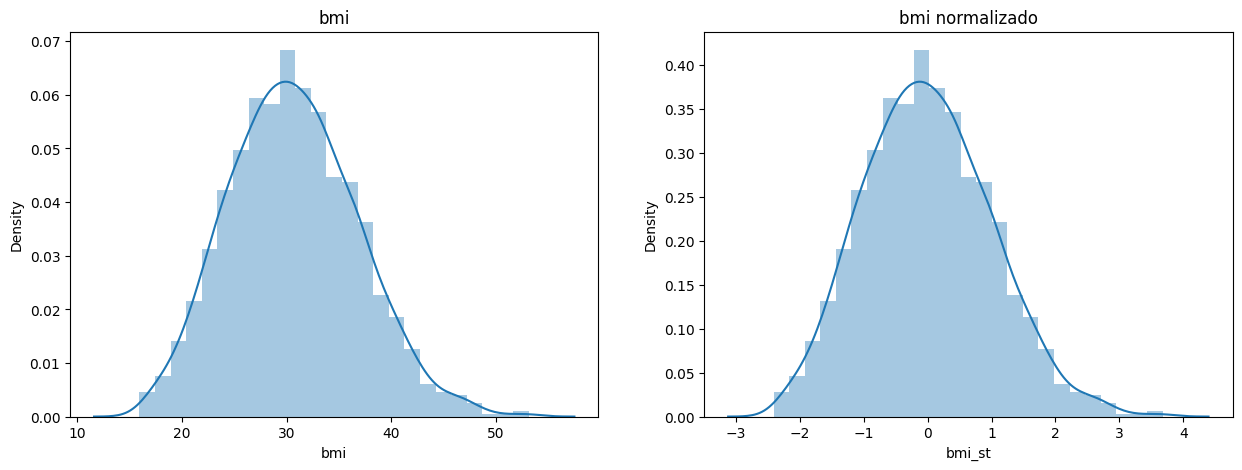

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('bmi')
axes[1].set_title('bmi normalizado')

sns.distplot(df['bmi'] ,ax = axes[0])
sns.distplot(df['bmi_st'], ax = axes[1]);

In [ ]:
#ENCONDING ordinal o nomial . ( CHECK )

In [ ]:
'''#Cuando tengamos varias categorias iguales
lo que podemos hacer en eses momento es agrupar y así tenemos 
una misma categoria y nos es más facil para realizar un eda en proceso final'''

In [ ]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

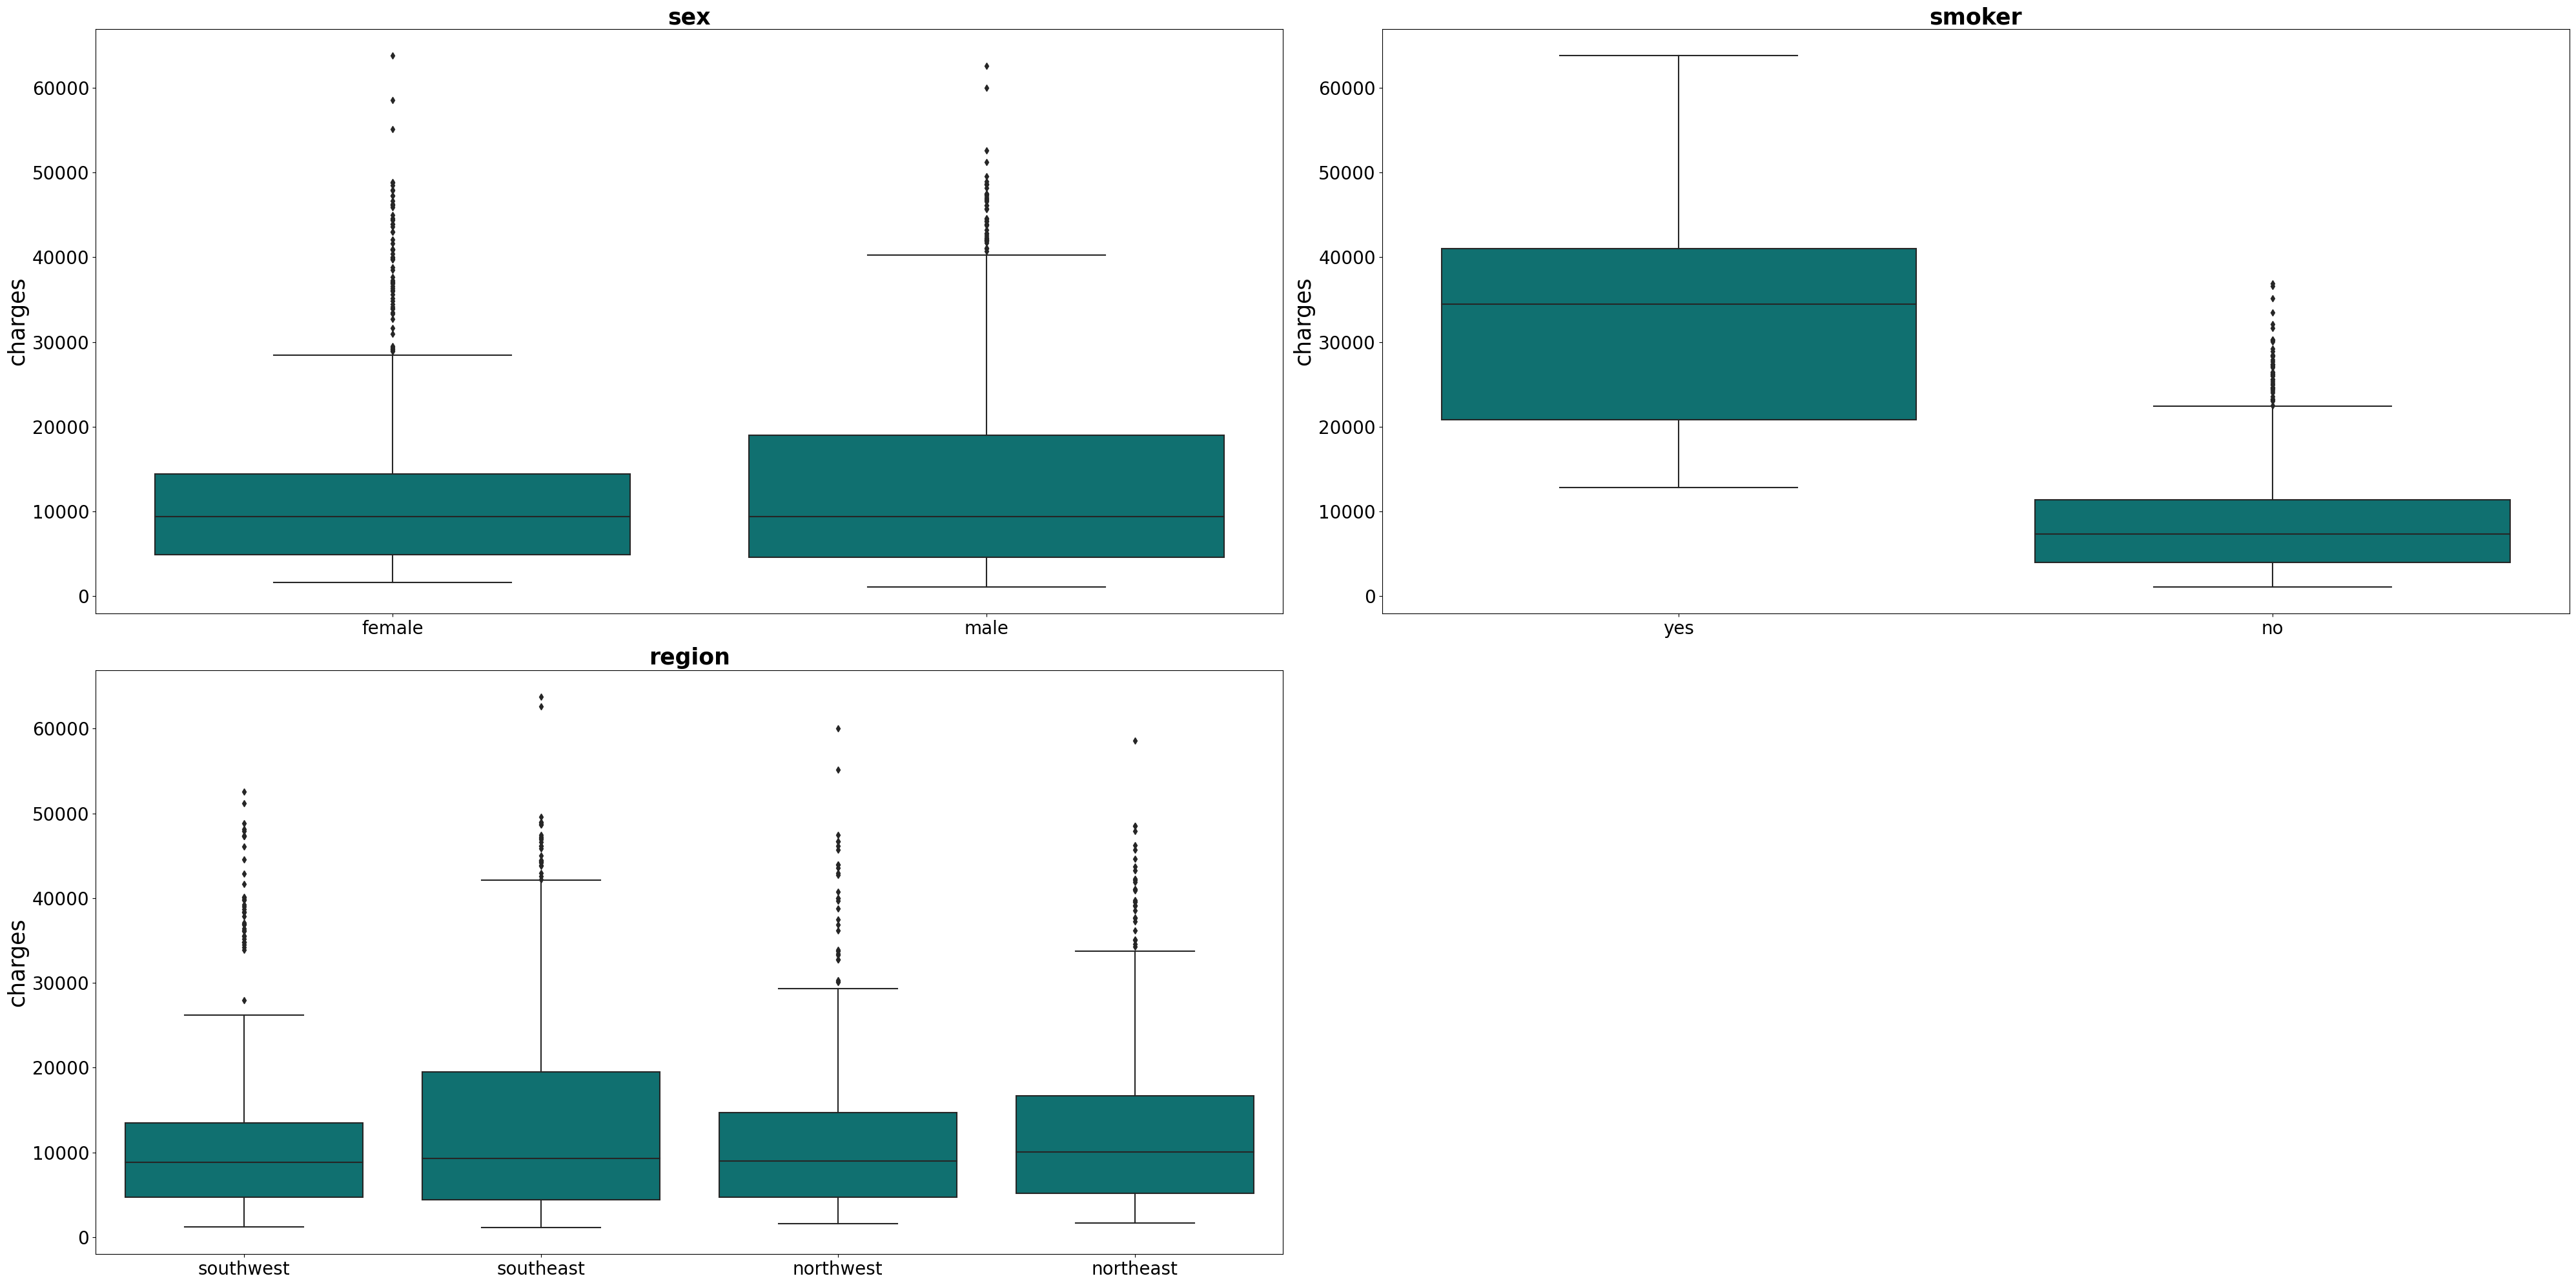

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (40, 20))


axes = axes.flat

columnas_cat = df.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat): 
    sns.boxplot(
        data = df,
        x = colum,
        y = "charges",
        color = "teal", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "charges", fontsize = 25)

fig.delaxes(axes[-1])

fig.tight_layout();

In [ ]:
df1 = df.copy()
df1.head()

,age,sex,bmi,children,smoker,region,charges,charges_NORM,charges_LOG,bmi_st
0,19,female,27.900,0,yes,southwest,16884.92400,0.057695,9.734176,-0.453151
1,18,male,33.770,1,no,southeast,1725.55230,-0.184280,7.453302,0.509431
2,28,male,33.000,3,no,southeast,4449.46200,-0.140801,8.400538,0.383164
3,33,male,22.705,0,no,northwest,21984.47061,0.139094,9.998092,-1.305043
4,32,male,28.880,0,no,northwest,3866.85520,-0.150100,8.260197,-0.292447


In [ ]:
oh = OneHotEncoder()

In [ ]:
transformados = oh.fit_transform(df1[["region"]])
type(transformados)

scipy.sparse._csr.csr_matrix

In [ ]:
oh_df = pd.DataFrame(transformados.toarray(), dtype = int)
oh_df.head()

,0,1,2,3
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
# el método get_feature_names nos va a dar el nombre de las columnas nuevas que se nos generarán
oh_df.columns = oh.get_feature_names_out()

In [ ]:
oh_df.columns = oh.get_feature_names_out()
oh_df.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
df1[oh_df.columns] = oh_df

In [ ]:
df1.head()

,age,sex,bmi,children,smoker,region,charges,charges_NORM,charges_LOG,bmi_st,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0.057695,9.734176,-0.453151,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,-0.184280,7.453302,0.509431,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,-0.140801,8.400538,0.383164,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0.139094,9.998092,-1.305043,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,-0.150100,8.260197,-0.292447,0,1,0,0


In [ ]:

def one_hot_encoder(dff, columnas):
    
    '''
    columnas: lista
    '''
    
    oh = OneHotEncoder()
    
    transformados = oh.fit_transform(dff[columnas])
    
    oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
    
    dff[oh_df.columns] = oh_df
    
    dff.drop(columnas, axis = 1, inplace = True)
    
    return dff

In [ ]:
''' Diferencia entre get dummies y hot es que en el hot puedes volver sobre tus pasasos atrás y por el contrario el get dummies ,una vez creado el modelo,
luego a la hora de pasar nuevos datos para poder sacar nuevas conclusiones necesita tener el mismo input que cualquiera de las otras variables, 
por eso que es más sencillo de realizar ya que el metodod de pandas es mas sencillo pero a la hora de aplicar y sacar conclusiones nos va  a ser mucho más practico,
el hot ya que podremos volver sobre nuestros pasos.'''

' Diferencia entre get dummies y hot es que en el hot puedes volver sobre tus pasasos atrás y por el contrario el get dummies ,una vez creado el modelo,\nluego a la hora de pasar nuevos datos para poder sacar nuevas conclusiones necesita tener el mismo input que cualquiera de las otras variables, \npor eso que es más sencillo de realizar ya que el metodod de pandas es mas sencillo pero a la hora de aplicar y sacar conclusiones nos va  a ser mucho más practico,\nel hot ya que podremos volver sobre nuestros pasos.'

In [ ]:
''' En cuanto a map y label encondig en este caso el label encodigon lo que hace es darle un valor aleatorio segun la cantidad de variables que tenga una categoria '''

In [ ]:
cv_scores = cross_val_score(
                            estimator = LinearRegression(),
                            x = x,
                            y = y,
                            scoring = "neg_root_mean_squared_error",
                            cv = 10 
)